In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfOrders=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/orders.csv')
dfDept=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/departments.csv')
dfOrdersPrior=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/order_products__prior.csv')
dfAisles=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/aisles.csv')
dfProd=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/products.csv')

In [3]:
dfOrdersPrior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
dfOrders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
dfDept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
dfAisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
dfProd.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
dfShelves = dfProd.merge(dfAisles).sort_values(by='product_name')
dfShelves = dfShelves.merge(dfDept).sort_values(by='product_name')
dfShelves.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,25773,#2 Coffee Filters,26,7,coffee,beverages
1,2158,#2 Cone White Coffee Filters,26,7,coffee,beverages
4365,26685,#2 Mechanical Pencils,87,17,more household,household
2,26381,#4 Natural Brown Coffee Filters,26,7,coffee,beverages
7450,20604,& Go! Hazelnut Spread + Pretzel Sticks,88,13,spreads,pantry


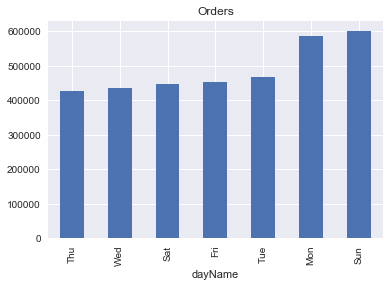

In [9]:
days = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'} #dictionary of numeric day:Alpha day
#week = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']
a = dfOrders #set new df equal to orders df
a['dayName']=a['order_dow'].apply(lambda x: days[x]) #create new column 'dayName' compare' order_dow' to dictionary
#a = a[a.user_id <= 100] #sample the first 1000 rows to limit calc time
a = a.set_index('order_dow').groupby('dayName').size().sort_values() #group the orders by dayName
a.plot(kind='bar',title='Orders') #plot as bar plot
#how do i rearrange these in sequence of days?

#a.set_index('dayName').ix[week].plot(kind='bar')

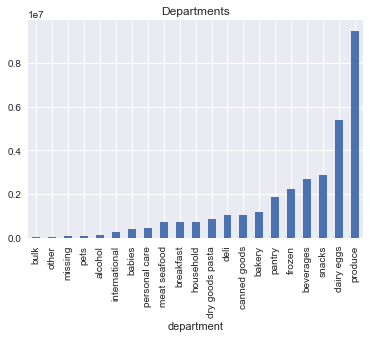

In [10]:
dfFun = dfOrdersPrior.merge(dfShelves) #combine the prior orders & shelf contents
a=dfFun.groupby(['department']).size().sort_values() #groupby department
a.plot(kind='bar',title='Departments')
#determine how to plot the biggest 25 departments on a bar chart
#shows the most popular departments

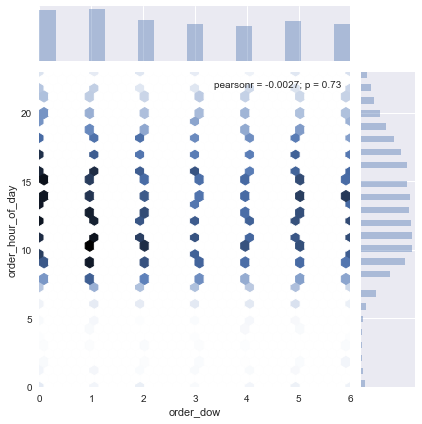

In [11]:
b = dfOrders
b = b[b.user_id <=1000]
#b = b.groupby(['order_dow','order_hour_of_day'])
sns.jointplot(x='order_dow',y='order_hour_of_day',data=b,kind='hex')


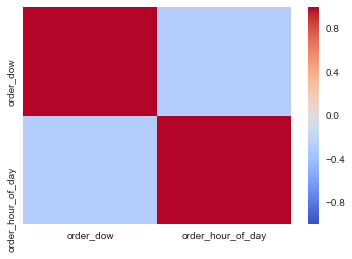

In [12]:
c = dfOrders[dfOrders.user_id <=10]
c=c[['order_dow','order_hour_of_day']]
c.set_index('order_dow')
sns.heatmap(c.corr(),cmap='coolwarm')

In [13]:
#d= dfOrders.fillna(0)
#d.head()
#sns.heatmap(d,cmap='coolwarm')
#what does this error mean?

In [14]:
e=dfOrders[dfOrders.user_id<=1000]
e=dfOrders[['order_dow','order_hour_of_day','days_since_prior_order']]
e=e.fillna(value=e['days_since_prior_order'].mean())
e.set_index(['order_dow','order_hour_of_day'],append=True)
#e=e.groupby(['order_dow'])
#e.pivot(index='order_dow',columns='order_hour_of_day',values='days_since_prior_order')
#sns.heatmap(e,cmap='coolwarm')
#why can't i make a pivot table on this data?
e.head()



,order_dow,order_hour_of_day,days_since_prior_order
0,2,8,11.114836
1,3,7,15.000000
2,3,12,21.000000
3,4,7,29.000000
4,4,15,28.000000


In [29]:
#test = dfOrders.pivot("order_dow", "order_hour_of_day", "days_since_prior_order")
#fig = sns.heatmap(test)

In [30]:
dfOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 8 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dayName                   object
dtypes: float64(1), int64(5), object(2)
memory usage: 208.8+ MB


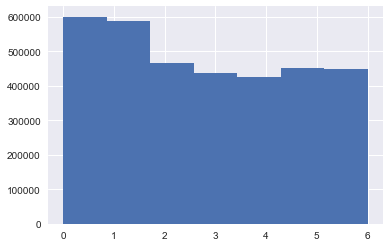

In [31]:
#continuous variable use historgram and .describe for summary statistics on feature
#categorical feature use barplot
dfOrders['order_dow'].hist(bins=7)

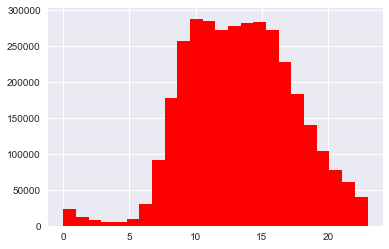

In [32]:
dfOrders['order_hour_of_day'].hist(bins=24,color='red')

In [33]:
dfOrders['order_hour_of_day'].describe()

count    3.421083e+06
mean     1.345202e+01
std      4.226088e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

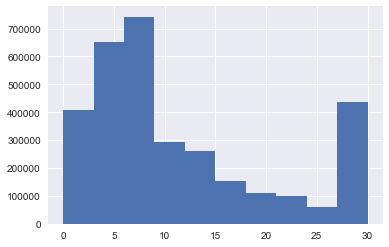

In [34]:
dfOrders['days_since_prior_order'].hist()

In [35]:
dfOrders['days_since_prior_order'].describe()

count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

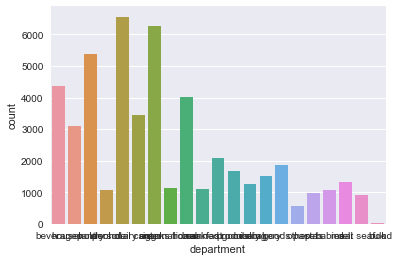

In [36]:
sns.countplot(x='department',data=dfShelves)

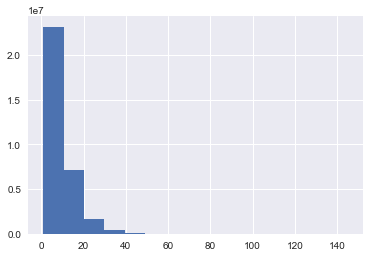

In [37]:
dfOrdersPrior['add_to_cart_order'].hist(bins=15)

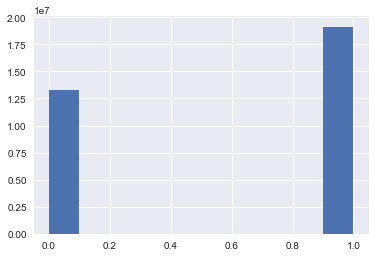

In [38]:
dfOrdersPrior['reordered'].hist()

In [39]:
dfDept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


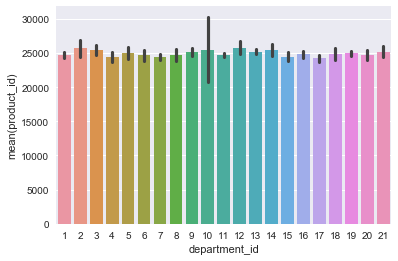

In [40]:
sns.barplot(x='department_id',y='product_id',data=dfProd)

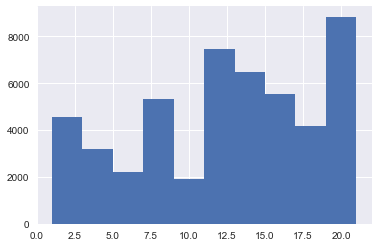

In [41]:
dfProd['department_id'].hist()

In [42]:
dfOrdersPrior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [43]:
dfOrdersPrior['add_to_cart_order'].describe()
#represents the sequence of adding items to cart
#summary stats aren't that meaningful

count    3.243449e+07
mean     8.351076e+00
std      7.126671e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      1.450000e+02
Name: add_to_cart_order, dtype: float64

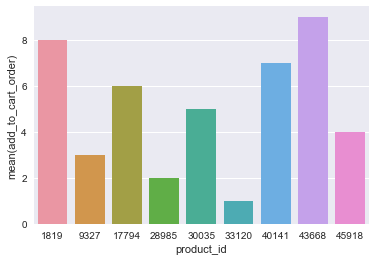

In [44]:
test=dfOrdersPrior[dfOrdersPrior.order_id == 2]
sns.barplot(x='product_id',y='add_to_cart_order',data=test)
#random bar plot of sequence of item added to cart

In [16]:
dfreOrder = dfShelves.merge(dfOrdersPrior)
dfreOrder.head(5)
#merge to include all shelves(dept/aisle/product) info with prior orders


,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
0,25773,#2 Coffee Filters,26,7,coffee,beverages,10427,1,1
1,25773,#2 Coffee Filters,26,7,coffee,beverages,11996,3,0
2,25773,#2 Coffee Filters,26,7,coffee,beverages,20770,3,0
3,25773,#2 Coffee Filters,26,7,coffee,beverages,22531,18,0
4,25773,#2 Coffee Filters,26,7,coffee,beverages,23489,5,1


In [ ]:
#tried to do basic arithmetic to show %reorder of each product, expected repeat values for same product_id
#dfreOrder['%reorder']= dfreOrder['reordered']*dfreOrder['product_id']/dfreOrder['product_id'].value_counts()
#dfreOrder.head(5)
#plt.scatter(x='product_id',y='reordered',data=dfreOrder)

In [24]:
#tried to aggregate and then use lambda to create df with department_id and repeat orders as a % of their sum of occurences
#ideally be able to produce same stats for aisle and product, then plot %reorder vs purchase count
#as a scatter plot of the aisle/product/department
dfreOrderSum = dfreOrder.groupby(['department_id']).agg({'reordered':'sum'})
dfreOrderPcts = dfreOrderSum.apply(lambda x: 100*x/float(x.sum()))
dfreOrderPcts = dfreOrderPcts.reset_index()
dfreOrderPcts=dfreOrderPcts.rename(columns={'reordered':'%reordered'})
dfreOrderPcts.head()

,department_id,%reordered
0,1,6.336171
1,2,0.077411
2,3,3.864725
3,4,32.210276
4,5,0.457976


In [ ]:
#map the new dictionary of product:%reordered to the old dataframe of prior purchases
#dfreOrder['%reorder3']=dfreOrder['product_id'].apply(lambda x: dictionary[x])
#dfreOrder.head()

In [26]:
#merge with prior orders dataset
dfNew = dfreOrder.merge(dfreOrderPcts,on='department_id')
dfNew.sort_values('%reordered',ascending=False).head()

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,%reordered
20470985,7628,"Dressing, Jersey Sweet Onion, Calorie Free",83,4,fresh vegetables,produce,2024242,28,0,32.210276
21594584,6238,Lettuce Red Butter Organic,123,4,packaged vegetables fruits,produce,3325792,7,0,32.210276
21594532,6238,Lettuce Red Butter Organic,123,4,packaged vegetables fruits,produce,3211963,12,0,32.210276
21594533,6238,Lettuce Red Butter Organic,123,4,packaged vegetables fruits,produce,3212614,3,1,32.210276
21594534,6238,Lettuce Red Butter Organic,123,4,packaged vegetables fruits,produce,3215339,4,1,32.210276


In [48]:
dfDept1 = dfDept.merge(dfreOrderPcts)
dfDept1.head()

,department_id,department,%reordered
0,1,frozen,6.336171
1,2,other,0.077411
2,3,bakery,3.864725
3,4,produce,32.210276
4,5,alcohol,0.457976


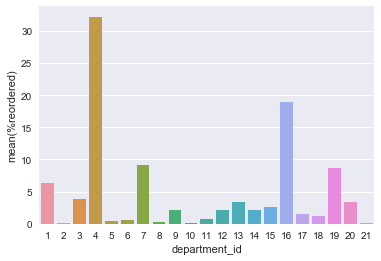

In [60]:
#barplot of the %reordered by department...would like to order these by ascending values.
sns.barplot(x='department_id',y='%reordered',data=dfDept1)